# Challenge Evaluate Sentiment Classifier
It's time to revisit your classifier from the previous assignment. Using the evaluation techniques we've covered here, look at your classifier's performance in more detail. Then go back and iterate by engineering new features, removing poor features, or tuning parameters. Repeat this process until you have five different versions of your classifier. Once you've iterated, answer these questions to compare the performance of each:

    1. Do any of your classifiers seem to overfit?
    2. Which seem to perform the best? Why?
    3. Which features seemed to be most impactful to performance?
    
## Import Data
1,000 amazon reviews are being imported. Note that 500 of the reviews are positive and 500 of the reviews are negative. This is denoted in the column 'Type' with 1 being positive and 0 being negative. The even split between the two classes eliminates class imbalance bias.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [2]:
# Import the data delimiter based on tabs
df = pd.read_csv('amazon_cells_labelled.txt', sep='\t', header=None)

# Rename columns note Type 1 = Positive Type 2 = Negative
df.columns = ['Review', 'Type']
df.head()

,Review,Type
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


## Data Exploration and Feature Engineering
The word cloud below helps one visualize the popularity of certain words within the reviews. Some of the most common words are: phone, product, good, great, work. Unfortunately, the word cloud does not help differentiate between positive and negative reviews. A listing will be generated with a count of the top 10 positive and negative words used. See below for more details. 

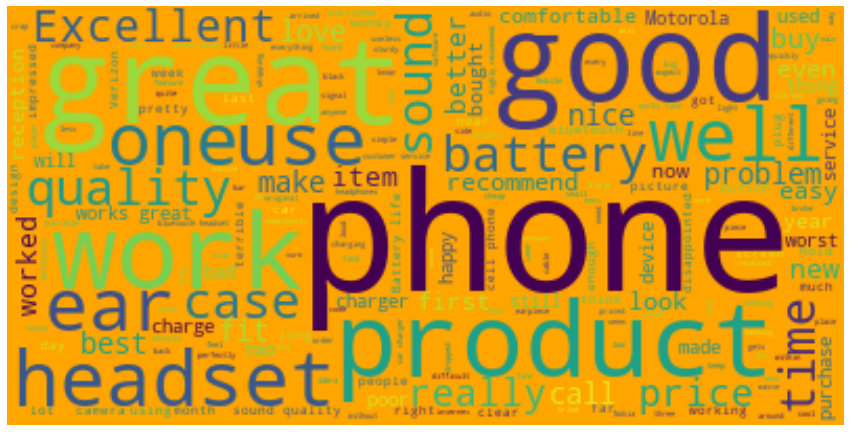

In [3]:
# Create a Word Cloud image
wordcloud = WordCloud(background_color='orange').generate(
    ''.join(df['Review']))

plt.figure(figsize=(15, 10))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

In [4]:
from collections import Counter

# Creating new dataframes for positive and negative feedback.
positive_raw = df[df['Type'] == 1]
negative_raw = df[df['Type'] == 0]

# Creating a list of the individual words in the strings.
positive_words = []
negative_words = []
for x in positive_raw['Review']:
    split = x.split()
    positive_words = positive_words + split

for x in negative_raw['Review']:
    split = x.split()
    negative_words = negative_words + split

# Using set's to determine common words in each of the lists.
intersect = list(set(positive_words) & set(negative_words))

for x in intersect:
    while x in positive_words:
        positive_words.remove(x)
    while x in negative_words:
        negative_words.remove(x)
        
# Converting the words to lowercase
positive_words = [x.lower() for x in positive_words]
negative_words = [x.lower() for x in negative_words]

# Getting a count of the words in each list, and printing the top 10 most common in each.
negative_counts = Counter(negative_words)
positive_counts = Counter(positive_words)    
positive_counts = positive_counts.most_common(10)
negative_counts = negative_counts.most_common(10)

print('Most common negative words:', negative_counts)
print('Most common positive words:', positive_counts)

Most common negative words: [('waste', 13), ('worst', 13), ('bad', 11), ("don't", 11), ('not', 9), ('poor', 9), ('do', 8), ('what', 7), ('money', 7), ("didn't", 7)]
Most common positive words: [('works', 43), ('great', 30), ('love', 20), ('best', 19), ('nice', 19), ('good', 13), ('working', 9), ('pretty', 8), ('excellent', 8), ('fine', 6)]


In [5]:
# create filter for positive words
positive_keywords = ['works', 'great', 'love', 'best', 'nice',
                     'good', 'working', 'pretty', 'excellent', 'fine']

negative_keywords = ["waste", "worst", "bad", "don't", "not",
            "poor", "do", "what", "money", "didn't"]

keywords = positive_keywords + negative_keywords


#create new boolean columns based on those words
for key in positive_keywords:
        df[str(key)] = df['Review'].str.contains(
            str(key), case=False)

for key in negative_keywords:
        df[str(key)] = df['Review'].str.contains(
            str(key), case=False)

## Model 1: Negative Words
In model 1, the model was created utilizing negative words. As seen below in the confusion matrix, positive reviews were identified correctly 90% of the time, while negative reviews were only identified correctly less than 50%.

In [6]:
# Create and data and target group
data = df[negative_keywords]
target = df['Type']

bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 323


In [7]:
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, 
    target, test_size=0.1, random_state=20)

print('With 10% Holdout: ' + str(
    bnb.fit(X_train, y_train).score(X_test, y_test)))

print('Testing on Sample: ' + str(
    bnb.fit(data, target).score(data, target)))

With 10% Holdout: 0.71
Testing on Sample: 0.677


In [8]:
# print cross validation array
cross_val_score(bnb, data, target, cv=10)

array([0.71, 0.72, 0.71, 0.66, 0.67, 0.65, 0.66, 0.6 , 0.73, 0.66])

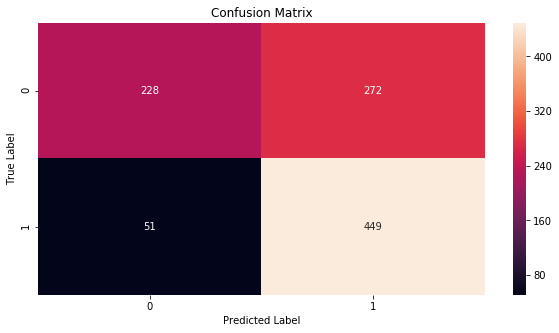

In [9]:
# create heatmap of confusion matrix
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(target, y_pred), annot=True, fmt='g')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

plt.show()

## Model 2: Positive Words
In model 2, the model was created utilizing positive words. As seen below this is almost a mirror results of model 1. The only difference is that it correctly identified more reviews. 

In [10]:
# Create and data and target group
data = df[positive_keywords]

bnb.fit(data, target)
y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 267


In [11]:
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, 
    target, test_size=0.1, random_state=20)

print('With 10% Holdout: ' + str(
    bnb.fit(X_train, y_train).score(X_test, y_test)))

print('Testing on Sample: ' + str(
    bnb.fit(data, target).score(data, target)))

With 10% Holdout: 0.73
Testing on Sample: 0.733


In [12]:
# print cross validation array
cross_val_score(bnb, data, target, cv=10)

array([0.79, 0.77, 0.8 , 0.77, 0.72, 0.69, 0.68, 0.69, 0.76, 0.66])

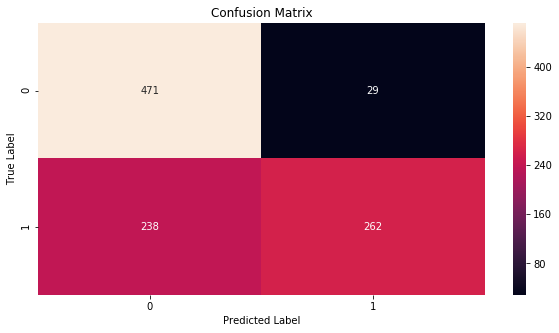

In [13]:
# create heatmap of confusion matrix
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(target, y_pred), annot=True, fmt='g')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

plt.show()

## Model 3: Combined Lists
In Model 3, both the the negative and positive lists were combined for the model. What is interesting with this model is that it is almost exactly the same as model 2. 

In [14]:
# Create and data and target group
data = df[keywords]

bnb.fit(data, target)
y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 260


In [15]:
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, 
    target, test_size=0.1, random_state=20)

print('With 10% Holdout: ' + str(
    bnb.fit(X_train, y_train).score(X_test, y_test)))

print('Testing on Sample: ' + str(
    bnb.fit(data, target).score(data, target)))

With 10% Holdout: 0.72
Testing on Sample: 0.74


In [16]:
# print cross validation array
cross_val_score(bnb, data, target, cv=10)

array([0.79, 0.78, 0.8 , 0.78, 0.73, 0.69, 0.67, 0.71, 0.78, 0.66])

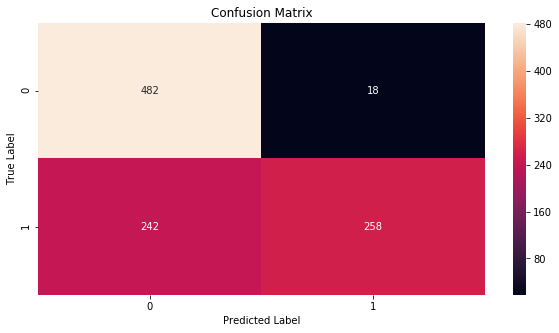

In [17]:
# create heatmap of confusion matrix
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(target, y_pred), annot=True, fmt='g')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

plt.show()

## Model 4: Review Length
For Model 4, the model will classify reviews as positive or negative based on the length of the review. The average length of both negative and positive reviews is calculated below. Interestingly, the average length of both positive and negative reviews are similar in length in the mid 50s. Out of all the models this was the least accurate with only a little over 50% of the reviews being classified correctly. 

In [18]:
# make two lists positive and negative 
pos_len = []
neg_len = []

# For each review classify positive and negative and append
# length of review to corresponding list
for i, review in enumerate(df['Type']):
    if review == 1:
        pos_len.append(len(df.loc[i , 'Review']))
    else:
        neg_len.append(len(df.loc[i , 'Review']))

# print the results
print('Average length of positive review is '+
      '{}'.format(sum(pos_len)/len(pos_len)))

print('Average length of negative review is '+
      '{}'.format(sum(neg_len)/len(neg_len)))

Average length of positive review is 53.628
Average length of negative review is 56.824


In [19]:
length = []

# create new variable based on length of review
for review in df['Review']:
    if len(review) >= 40:
        length.append(False)
    else:
        length.append(True)
        
df['Length'] = length
word_length = ['Length']

In [20]:
# Create and data and target group
data = df[word_length]

bnb.fit(data, target)
y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 468


In [21]:
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, 
    target, test_size=0.1, random_state=20)

print('With 10% Holdout: ' + str(
    bnb.fit(X_train, y_train).score(X_test, y_test)))

print('Testing on Sample: ' + str(
    bnb.fit(data, target).score(data, target)))

With 10% Holdout: 0.54
Testing on Sample: 0.532


In [22]:
# print cross validation array
cross_val_score(bnb, data, target, cv=10)

array([0.58, 0.49, 0.5 , 0.53, 0.59, 0.54, 0.53, 0.53, 0.53, 0.5 ])

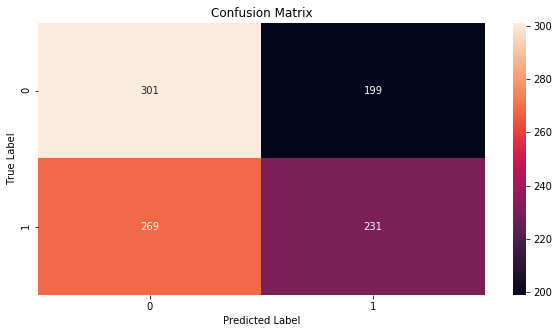

In [23]:
# create heatmap of confusion matrix
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(target, y_pred), annot=True, fmt='g')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

plt.show()

## Model 5: Combined Word List + Word Length
For Model 5, the combined word list and word length was combined. This model has the best split in identification than all the other models. It is almost as accurate as Model 3.

In [24]:
model5_words = keywords + word_length
data= df[model5_words]

bnb.fit(data, target)
y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 269


In [25]:
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, 
    target, test_size=0.1, random_state=20)

print('With 10% Holdout: ' + str(
    bnb.fit(X_train, y_train).score(X_test, y_test)))

print('Testing on Sample: ' + str(
    bnb.fit(data, target).score(data, target)))

With 10% Holdout: 0.76
Testing on Sample: 0.731


In [26]:
# print cross validation array
cross_val_score(bnb, data, target, cv=10)

array([0.81, 0.79, 0.74, 0.75, 0.74, 0.68, 0.69, 0.7 , 0.79, 0.61])

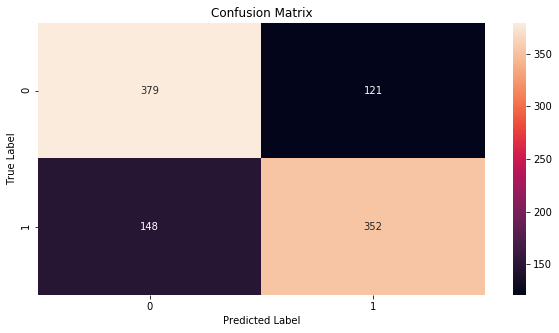

In [27]:
# create heatmap of confusion matrix
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(target, y_pred), annot=True, fmt='g')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

plt.show()

# Discussion and Conclusions
## 1. Overfitting Classifiers
In almost all of the models the classifer was overfitted. Interestingly enough, the least accurate model is also the least overfit: model 4. When looking at the cross validation for the rest of the iterations, the accuracy of the classifer swung drastically from 60 - 80 %.

## 2. Best Performance
Model 3 is the most accurate iteration with only 260 misclassified. Unfortunately, it is skewed towards correctly identifying negative reviews and an even split on the positive ones. One wouldn't classify this model as the best performance. 

Out of all the models the best one was model 5. That model combined the positive and negative word list as well as the length categorization. It was one of the most accurate model, and it correctly identified about the same amount for both positive and negative reviews ie. 360. Unfortunately it is still overfitted as the data drastically swings in accuracy in the cross validation.

## 3. Impactful Features
The most impactful features were the combination of both positive and negative words. The addition of review length help remove the identification bias towards one side. 